In [221]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

When do the most adoptions happen?
outcomes
types of animals
age of adoption vs euthanasia
dark vs light color

In [222]:
df = pd.read_csv('shelteranimaloutcome.csv')
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [223]:
df.shape

(26729, 10)

In [224]:
df.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [225]:
typ = {"Dog":1,"Cat":2}
df["AnimalType"] = df["AnimalType"].map(typ)
#Check if it worked
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,1,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,2,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,1,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,2,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,1,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


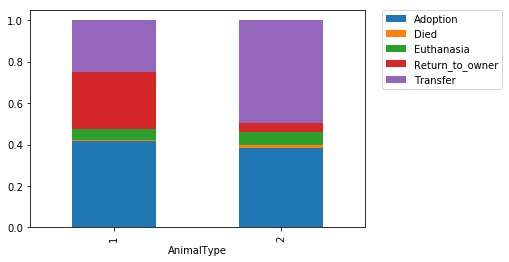

In [226]:
p_table = pd.pivot_table(df,index='AnimalType',columns='OutcomeType',aggfunc='size')
p_table = p_table.div(p_table.sum(axis=1), axis=0)
p_table.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(loc='best') 

In [227]:
adoptmonths = [i[:7] for i in df["DateTime"]]
df['MonthYear'] = adoptmonths

In [228]:
dog = df[df["AnimalType"]==1] 
dogo=dog.groupby(['AnimalType','OutcomeType']).agg({'OutcomeType': 'count'})
dogpercent = dogo.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
dog = dogpercent
dog

OutcomeType
AnimalType OutcomeType                 
1          Adoption           41.660789
           Died                0.320616
           Euthanasia          5.418403
           Return_to_owner    27.483168
           Transfer           25.117025

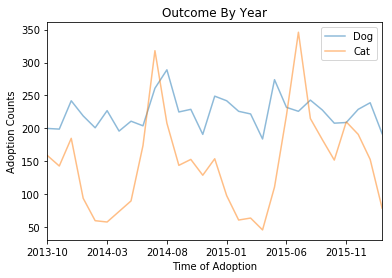

In [229]:
adoptout= df[['OutcomeType','AnimalType','MonthYear']]
adoptout = adoptout[(adoptout["OutcomeType"]=='Adoption')]
adoptout = adoptout[['MonthYear','AnimalType']].groupby(['MonthYear','AnimalType']).size().unstack().plot(alpha=0.5,title="Outcome By Year")
plt.legend(['Dog','Cat'])
plt.ylabel("Adoption Counts")
plt.xlabel("Time of Adoption")
adoptout

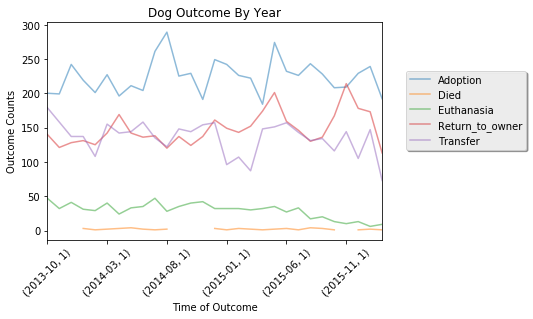

In [260]:
outcomesdog= df[['OutcomeType','AnimalType','MonthYear']]
outcomesdog = outcomesdog[(outcomesdog["AnimalType"]==1)]
outcomesdog = outcomesdog[['MonthYear','AnimalType','OutcomeType']].groupby(['MonthYear','AnimalType','OutcomeType']).size().unstack().plot(alpha=0.5,title="Dog Outcome By Year")

plt.ylabel("Outcome Counts")
plt.xlabel("Time of Outcome")
plt.xticks (rotation=45)
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)
outcomesdog

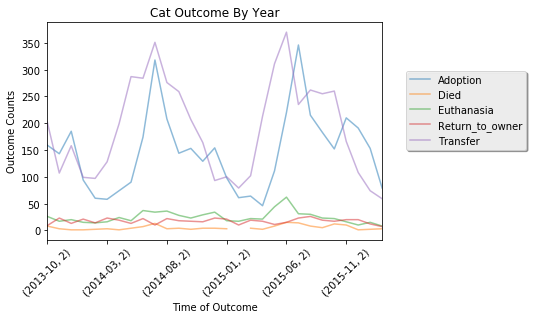

In [262]:
outcomescat= df[['OutcomeType','AnimalType','MonthYear']]
outcomescat = outcomescat[(outcomescat["AnimalType"]==2)]
outcomescat = outcomescat[['MonthYear','AnimalType','OutcomeType']].groupby(['MonthYear','AnimalType','OutcomeType']).size().unstack().plot(alpha=0.5,title="Cat Outcome By Year")

plt.ylabel("Outcome Counts")
plt.xlabel("Time of Outcome")
plt.xticks (rotation=45)
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)
outcomescat